In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

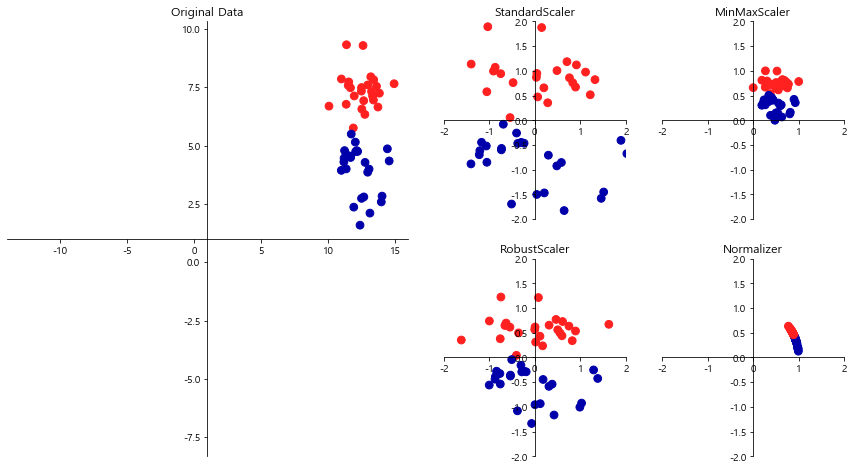

In [3]:
import mglearn

mglearn.plots.plot_scaling()

### 1. Min-Max Scaling(p. 178 3))
- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$ 

Sklearn에서 Min-Max Scaler는 preprocessing 패키지에 있습니다.

# 1. Min-Max SCaling
* Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경

In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data,
                        columns=cancer.feature_names)

cancer_df.head()

C:\Users\has91\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\has91\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
print('feature들의 최소 값')
print(cancer_df.min())
print('\nfeature들의 최대 값')
print(cancer_df.max())

feature들의 최소 값
mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.0272

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state = 1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# MinMaxScaler의 fit 메서드는 훈련세트에 있는 특성마다 최대/최소값을 계산

scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
# fit 메서드로 합급한 변환을 적용하려면 스케일 객체의
# transform 메서드를 사용 데이터 변환

X_train_scaled = scaler.transform(X_train) # 스케일 변환
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(X_train.max(axis=0)))

print("스케일 조정 후 특성별 최소값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_train_scaled.min(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cancer.feature_names)
X_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.389938,0.707136,0.411927,0.243224,0.470976,0.708215,0.597470,0.468638,0.539394,0.467590,...,0.341160,0.820096,0.389910,0.179365,0.465760,0.839448,1.000000,0.809622,0.599572,0.917550
1,0.377633,0.317552,0.367908,0.230668,0.336643,0.294965,0.139175,0.239513,0.413636,0.181938,...,0.295980,0.377665,0.292295,0.153510,0.397081,0.302775,0.154188,0.511684,0.331749,0.315987
2,0.364381,0.352384,0.352083,0.229480,0.415636,0.196843,0.173266,0.261382,0.265657,0.197319,...,0.396300,0.502665,0.363514,0.234172,0.496797,0.175498,0.249060,0.552921,0.347671,0.288575
3,0.158029,0.224552,0.148711,0.076946,0.376546,0.114320,0.023711,0.027311,0.416667,0.258624,...,0.118107,0.259861,0.103143,0.049081,0.378591,0.067131,0.037470,0.081821,0.264971,0.201092
4,0.230442,0.262090,0.219404,0.122672,0.280672,0.138561,0.062980,0.113320,0.411616,0.151835,...,0.182497,0.365938,0.169032,0.081744,0.434062,0.163088,0.112479,0.314089,0.364781,0.159118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.606228,0.521136,0.598507,0.444751,0.441184,0.521921,0.596298,0.571074,0.576768,0.239288,...,0.522946,0.574627,0.489516,0.345016,0.371987,0.394033,0.484872,0.595189,0.413260,0.315237
422,0.178380,0.177883,0.169097,0.089841,0.228401,0.119744,0.052741,0.039140,0.171212,0.145902,...,0.143010,0.231876,0.136361,0.062918,0.240573,0.104337,0.083376,0.117285,0.174430,0.133633
423,0.483648,0.500845,0.486559,0.333362,0.491740,0.612075,0.396439,0.394831,0.437879,0.321468,...,0.547492,0.581023,0.503959,0.367627,0.576702,0.782014,0.561197,0.652577,0.415162,0.842596
424,0.333617,0.390260,0.317877,0.195080,0.343685,0.187304,0.034255,0.094235,0.230808,0.178203,...,0.263252,0.486674,0.238358,0.130333,0.379912,0.136183,0.053256,0.273643,0.156844,0.224435


In [14]:
X_train_scaled.min()

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
dtype: float64

In [15]:
X_train_scaled.max()

mean radius                1.0
mean texture               1.0
mean perimeter             1.0
mean area                  1.0
mean smoothness            1.0
mean compactness           1.0
mean concavity             1.0
mean concave points        1.0
mean symmetry              1.0
mean fractal dimension     1.0
radius error               1.0
texture error              1.0
perimeter error            1.0
area error                 1.0
smoothness error           1.0
compactness error          1.0
concavity error            1.0
concave points error       1.0
symmetry error             1.0
fractal dimension error    1.0
worst radius               1.0
worst texture              1.0
worst perimeter            1.0
worst area                 1.0
worst smoothness           1.0
worst compactness          1.0
worst concavity            1.0
worst concave points       1.0
worst symmetry             1.0
worst fractal dimension    1.0
dtype: float64

In [16]:
X_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.337853,0.325399,0.332634,0.217445,0.395715,0.318702,0.207408,0.242699,0.377479,0.276264,...,0.297817,0.363895,0.284270,0.173015,0.403200,0.250337,0.230825,0.393897,0.311575,0.306637
std,0.170548,0.147265,0.171662,0.153378,0.124705,0.190771,0.186537,0.194390,0.137147,0.149148,...,0.177544,0.167271,0.172366,0.145758,0.146829,0.169590,0.174366,0.229256,0.137195,0.180630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220148,0.219056,0.213375,0.114157,0.307755,0.173706,0.067045,0.098347,0.282828,0.172984,...,0.175293,0.240338,0.163056,0.078954,0.306941,0.132065,0.093120,0.221108,0.222077,0.179355
50%,0.298121,0.307744,0.292447,0.169905,0.395369,0.289578,0.143861,0.167495,0.370707,0.252692,...,0.245998,0.350880,0.232731,0.121018,0.399062,0.209541,0.196581,0.339708,0.295865,0.267695
75%,0.418927,0.409452,0.416246,0.272980,0.476167,0.415588,0.309396,0.367942,0.447348,0.347946,...,0.383404,0.474747,0.371732,0.216231,0.486892,0.345164,0.326838,0.569674,0.377020,0.394502
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* MInMaxScaler 이므로 최소와 최댓값이 0,1로 변환
* 데이터의 배열 크기는 원래 데이터와 동일, 각 속성의 값이 0~1으로 변형

### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

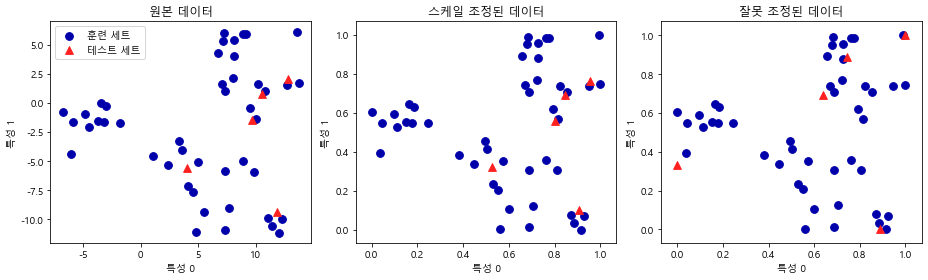

In [17]:
# p. 188
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler() 
test_scaler.fit(X_test) # 잘못 된 예
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

fig.tight_layout()

# 테스트 포인트는 스케일이 다르게 조정되었기 때문에 훈련 세트와 다른 비율로 이동

## 데이터 변환 적용하기

In [49]:
# 데이터 변환
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값: \n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값: \n{}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값: 
[0.52670484 0.10294512]
스케일 조정 후 특성별 최대값: 
[0.95397284 0.76554432]


* MinMaxScaler로 스케일을 조정한 테스트 세트의 최대/최소값은 1과 0이 아니며 일부 특성은 0~1범위를 넘어간다.

## 유방암 데이터셋: 데이터 전처리를 하기 전의 성능

In [72]:
from sklearn.svm import SVC

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state = 0)

svm = SVC(C=100)
svm.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.2f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 데이터 전처리 성능 측정-MinMaxScaler 사용(유방암)

In [73]:
# 0~1 사이로 스케일 조정
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 훈련 세트 정확도 : {:.2f}".format(svm.score(
    X_train_scaled, y_train)))

print("스케일 조정된 테스트 세트 정확도 : {:.2f}".format(svm.score(
X_test_scaled, y_test)))

스케일 조정된 훈련 세트 정확도 : 0.99
스케일 조정된 테스트 세트 정확도 : 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 2. standard Scaling (p 178)
z- score 라고 하는 데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다. 데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, Mean(X) $$
$$ \sigma : 데이터의\ 표준편차, Std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$

sklearn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

## 데이터 전처리 성능 측정-StandardScaler 사용(유방암)

In [74]:
print('feature 들의 평균 값')
print(cancer_df.mean())
print('\n feature 들의 분산 값')
print(cancer_df.var())

feature 들의 평균 값
mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254

In [77]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_scaled_standard = standard_scaler.transform(X_train)
X_test_scaled_standard = standard_scaler.transform(X_test)

# 조정 데이터로 SVM 학습
svm.fit(X_train_scaled_standard, y_train)
print("스케일 조정된 훈련 세트 정확도 : {:.2f}".format(svm.score(X_train_scaled_standard, y_train)))

print("스케일 조정된 테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled_standard, y_test)))



스케일 조정된 훈련 세트 정확도 : 1.00
스케일 조정된 테스트 세트 정확도 : 0.96


# 차원축소, 특성 추출, 매니폴드 학습

# 차원축소 (PCA)

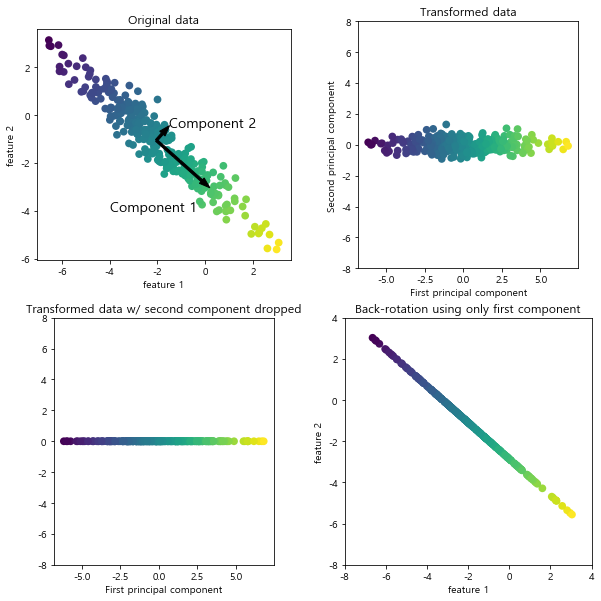

In [18]:
import mglearn
mglearn.plots.plot_pca_illustration()

### PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 사각화 영역
'malignant' 'benign' 두 클래스에 대해 각 특성의 히스토그램을 그리면 보다 쉽게 해석 가능

### PCA 적용해 유방암 데이터셋 시각화하기

In [85]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import mglearn
cancer = load_breast_cancer()

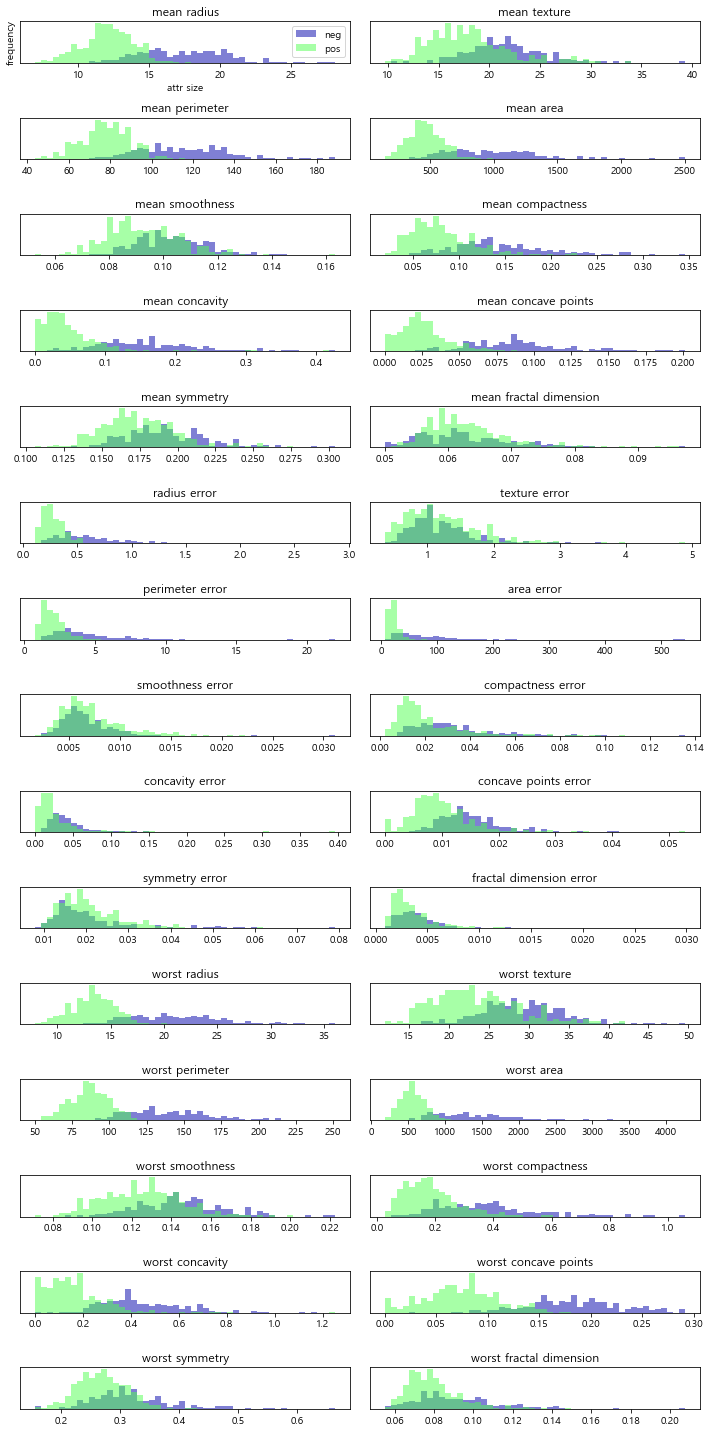

In [98]:
fig,axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50) # bins: histogram 간격
    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins, color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("attr size")
ax[0].set_ylabel("frequency")
ax[0].legend(["neg","pos"],loc="best")
fig.tight_layout()      
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler
# 특성의 분산이 1이 되도록
standard_scaler = StandardScaler()
standard_scaler.fit(cancer.data)
X_scaled = standard_scaler.transform(cancer.data)

In [104]:
from sklearn.decomposition import PCA
# 데이터 처음 2개의 성분만 유지
pca = PCA(n_components=2)

# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)
# 처음 두개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


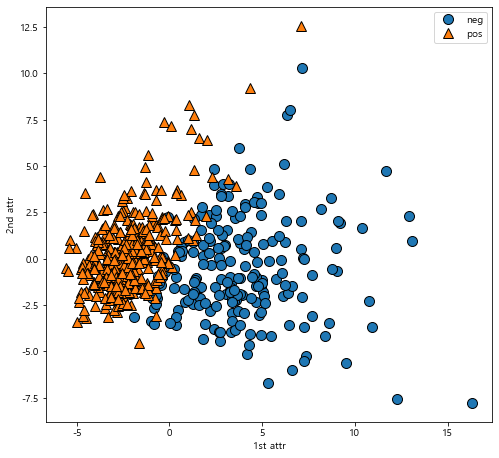

In [99]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["neg", "pos"], loc = "best")
plt.gca().set_aspect("equal")
plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

In [90]:
print("PCA 주성분: {}".format(pca.components_.shape))
print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


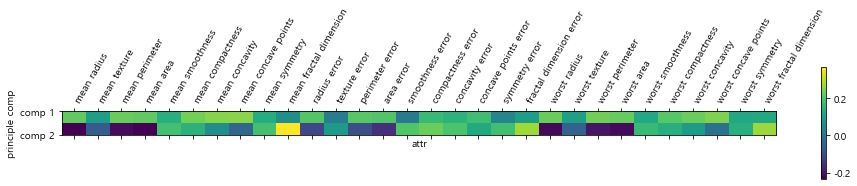

In [102]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["comp 1", "comp 2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names,
          rotation = 60, ha = 'left')
plt.xlabel("attr")
plt.ylabel("principle comp")
plt.show()

<class 'pandas.core.series.Series'>


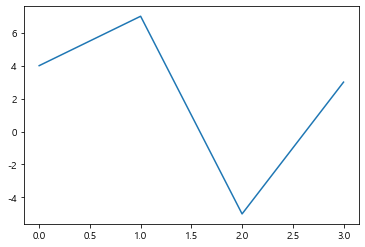

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
obj = pd.Series([4, 7, -5, 3])
print(type(obj))
obj
plt.plot(obj)
plt.show()